# Image of the Russian Empire

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

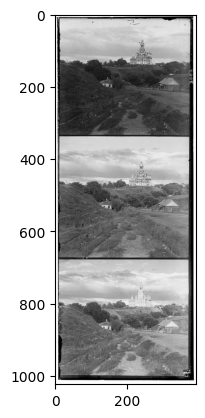

In [3]:
imname = 'images/cathedral.jpg'

img = cv2.imread(imname)

plt.imshow(img)

In [4]:
img.shape

(1024, 390, 3)

## Slice Images

In [5]:
slice = int(1024/3)

slice

341

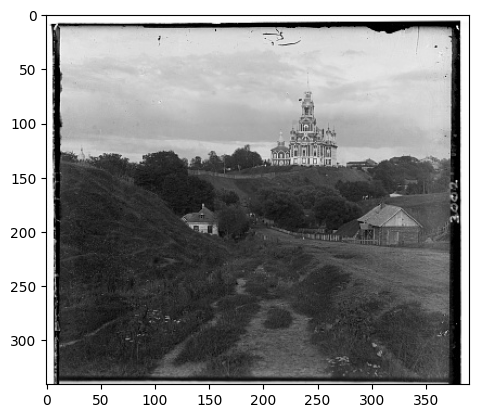

In [6]:
img_b = img[:slice, :, :]

plt.imshow(img_b)

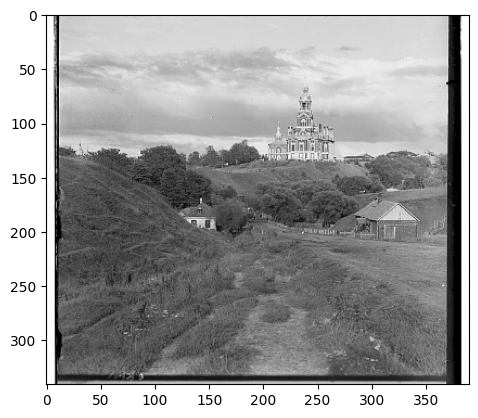

In [7]:
img_g = img[slice:2*slice, :, :]

plt.imshow(img_g)

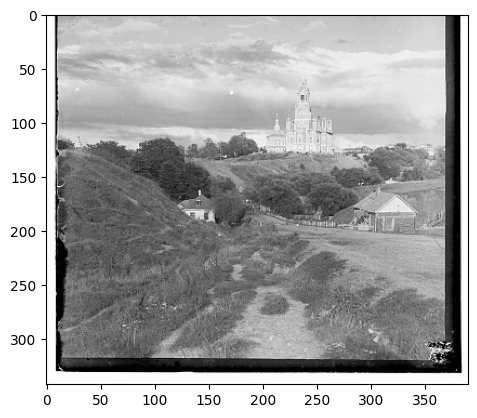

In [ ]:
img_r = img[2*slice:, :, :]

plt.imshow(img_r)

In [12]:
img_r.shape

img_r = img_r[:341, :, :]

img_r.shape

(341, 390, 3)

In [13]:
print(img_b.shape)
print(img_g.shape)
print(img_r.shape)

(341, 390, 3)
(341, 390, 3)
(341, 390, 3)


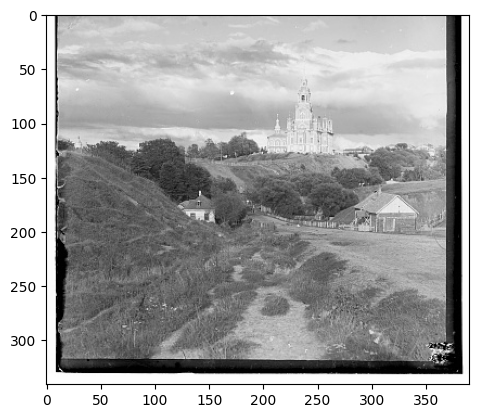

In [15]:
plt.imshow(img_r)

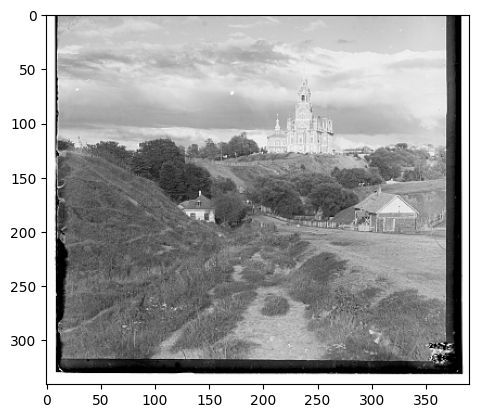

In [53]:
plt.imshow(img_r[:, :, 0], cmap='gray')

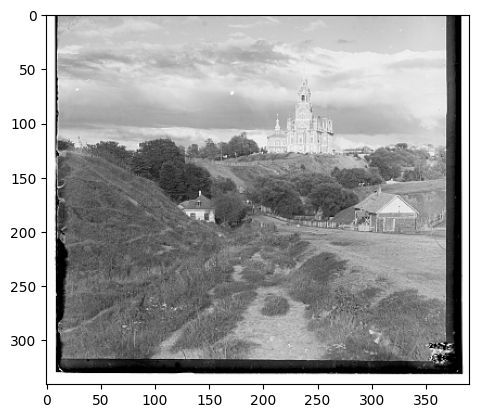

In [52]:
plt.imshow(img_r[:, :, 1], cmap='gray')

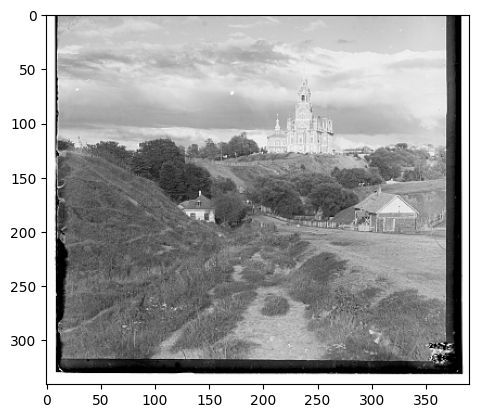

In [54]:
plt.imshow(img_r[:, :, 2], cmap='gray')

### Next Steps: 
1. Align Images
2. Stack Images

## Scale down Images (H, W, 3) -> (H, W)

In [59]:
img_b_1 = img_b[:, :, 0]
img_g_1 = img_g[:, :, 0]
img_r_1 = img_r[:, :, 0]


print(img_b_1.shape)
print(img_g_1.shape)
print(img_r_1.shape)

(341, 390)
(341, 390)
(341, 390)


## Align Images

In [60]:
def align_images(base_img, img_to_align, search_range=15):
    best_score = float('inf')
    best_disp = (0, 0)

    for dy in range(-search_range, search_range + 1):
        for dx in range(-search_range, search_range + 1):
            shifted = np.roll(np.roll(img_to_align, dy, axis=0), dx, axis=1)
            score = np.sum((base_img - shifted)**2)
            if score < best_score:
                best_score = score
                best_disp = (dy, dx)

    aligned = np.roll(np.roll(img_to_align, best_disp[0], axis=0),
                      best_disp[1], axis=1)
    return best_disp, aligned

## Stack Images

G shift (dy, dx): (3, 0)
R shift (dy, dx): (8, -1)


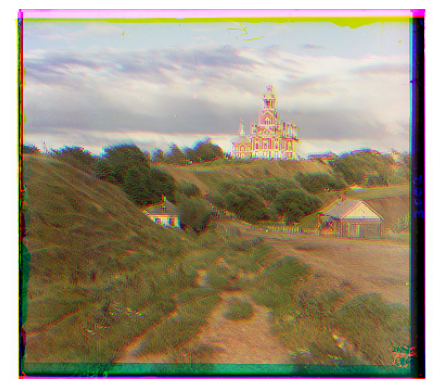

In [63]:
g_disp, img_g_aligned = align_images(img_b_1, img_g_1)
r_disp, img_r_aligned = align_images(img_b_1, img_r_1)

print("G shift (dy, dx):", g_disp)
print("R shift (dy, dx):", r_disp)

# Stack into RGB color image
aligned_color = np.dstack([img_r_aligned, img_g_aligned, img_b_1])

import matplotlib.pyplot as plt
plt.imshow(aligned_color)
plt.axis('off')
plt.show()

### Mock Code

# name of the input file
imname = 'cathedral.jpg'

# read in the image
im = cv2.imread(imname)

# convert to double (might want to do this later on to save memory)
#im = sk.img_as_float(im)

# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(np.int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]

# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

### ag = align(g, b)
### ar = align(r, b)
# create a color image
im_out = np.dstack([ar, ag, b])

# save the image
fname = '/out_path/out_fname.jpg'
skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()